In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Trucks_Data.xlsx')

In [3]:
df.columns

Index(['clientID', 'clientsubID', 'Numéro d'immatriculation du camion ',
       'Date d'achat ', 'Camion encore en exploitation ',
       'Si camion hors exploitation, date de fin d'utlisation\n du camion ',
       'Kilométrage à la date\n de fin d'exploitation  ou au 1er janvier 2018',
       'Type du véhicule (porteur/tracteur)',
       'Camion neuf ou d'occasion au moment de l'acquisition ', 'Marque ',
       'Modèle ', 'Tonnage (PTAC en tonnes)',
       'Nombre d'essieux (nombre entier)',
       'Nombre de roues x nombre de roues motrices',
       'Puissance du moteur \n(chevaux DIN) ',
       'Norme d'émissions \nEuro \n(EURO 1 à 6) ',
       'Mode d'acquisition du camion : \n(1) achat\n(2) leasing / crédit-bail \n(3) locatio',
       'Acquisition effectuée dans le cadre \nd'une acquisition groupée \n(plusieurs véhic',
       'Si acquisition groupée, taille de l'acquisition groupée \nen nombre de véhicules ',
       'Prix d'achat du camion complet (euros HT)',
       'Prix d'achat

In [4]:
df_VOLVO = df[df['Marque '] == 'VOLVO']

df_VOLVO = df_VOLVO.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})
df_VOLVO.columns

L_marque = []
for marque in df['Marque '].unique():
    locals()["df_" + f"{marque}"]= df[df['Marque '] == marque]
    L_marque.append(marque)
print(L_marque)
df_RENAULT


['VOLVO', 'RENAULT', 'MAN', 'AUTRE', 'DAF', 'DAIMLER', 'SCANIA', 'IVECO']


,clientID,clientsubID,Numéro d'immatriculation du camion,Date d'achat,Camion encore en exploitation,"Si camion hors exploitation, date de fin d'utlisation\n du camion",Kilométrage à la date\n de fin d'exploitation ou au 1er janvier 2018,Type du véhicule (porteur/tracteur),Camion neuf ou d'occasion au moment de l'acquisition,Marque,...,IVECO,MAN,RENAULT,SCANIA,VOLVO,acquisition,grp,PTAC,Puissance,roues_m
55,2,1,1230QZ41,1998-02-07,HORS EXPLOITATION,2008-12-10 00:00:00,768085.0,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,385.000000,2.0
57,2,1,4807 RD 41,2000-07-31,HORS EXPLOITATION,2008-01-18 00:00:00,965394.0,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,3.0,1,19.0,340.000000,2.0
62,2,1,6636SQ41/DC271HV,2008-11-17,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,451.393829,2.0
64,2,1,CF996LB,2012-05-23,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,530.251770,2.0
66,2,1,DH064VM,2014-07-22,EN EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,489.463196,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,40,1,6052 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6416,40,1,6053 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6417,40,1,6054 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0
6418,40,1,6055 VN 88,2008-02-12,HORS EXPLOITATION,NaN,NaN,TRACTEUR,NEUF,RENAULT,...,0,0,1,0,0,2.0,1,19.0,NaN,2.0


In [5]:
#Trouver le nombre de type de véhicule vendu par firme pour montrer qu'elles ne sont pas sur le même marché
#Regrouper par valeur
def stat_marque(data):
    #print(pd.unique(data['nb_roues_x_nb_roues_motrice']))
    data = data.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})

    data.replace({'nb_roues_x_nb_roues_motrice':'4X2'}, '4x2', inplace = True)
    data.replace({'nb_roues_x_nb_roues_motrice':'6X2'}, '6x2', inplace = True)
    data.replace({'nb_roues_x_nb_roues_motrice':'4 x 2'}, '4x2', inplace = True)
    data.replace({'nb_roues_x_nb_roues_motrice':'6 x 2'}, '6x2', inplace = True)

    #stat_VOLVO = data['nb_roues_x_nb_roues_motrice'].value_counts()
    stat_data = data['nb_roues_x_nb_roues_motrice'].value_counts().rename_axis('type').reset_index(name='counts')
    #Modifier les valeurs de certaines colonnes qui sont mal labélisées.
    stat_data.dropna(inplace = True)
    #stat_data = data['nb_roues_x_nb_roues_motrice'].value_counts()
    return stat_data

In [6]:
for marque in L_marque:
    print(f"{marque}", stat_marque(locals()["df_" + f"{marque}"]))

VOLVO   type  counts
0  4x2     962
1  6x2      20
2  6x4      19
3  8X4       4
4    2       2
RENAULT       type  counts
0      4x2    1546
1      6x2      41
2        2       8
3      8X4       7
4    6X2/4       5
5      6X4       3
6    4X2 6       1
7     6X2S       1
8      8x4       1
9   TRIDEM       1
10    4X2X       1
11               1
MAN   type  counts
0  4x2     765
1  6x2      15
2  8x2       2
AUTRE   type  counts
0  4x2      31
1  8X6       1
DAF   type  counts
0  4x2     496
1    2      41
2  6x2      20
3   42       1
DAIMLER    type  counts
0   4x2     928
1   6x2      39
2   4x2       1
3     2       1
4   <<<       1
SCANIA   type  counts
0  4x2     275
1    2      46
2  6x2       9
IVECO    type  counts
0   4x2     221
1   6x2       5
2  4Xx2       1
3     2       1


In [79]:
#Plot l'évolution des prix des camions de même type pour les différentes companies
new_df = pd.read_excel("Trucks_Data.xlsx", parse_dates=["date"]) 

In [80]:
new_df.columns

Index(['clientID', 'clientsubID', 'Numéro d'immatriculation du camion ',
       'Date d'achat ', 'Camion encore en exploitation ',
       'Si camion hors exploitation, date de fin d'utlisation\n du camion ',
       'Kilométrage à la date\n de fin d'exploitation  ou au 1er janvier 2018',
       'Type du véhicule (porteur/tracteur)',
       'Camion neuf ou d'occasion au moment de l'acquisition ', 'Marque ',
       'Modèle ', 'Tonnage (PTAC en tonnes)',
       'Nombre d'essieux (nombre entier)',
       'Nombre de roues x nombre de roues motrices',
       'Puissance du moteur \n(chevaux DIN) ',
       'Norme d'émissions \nEuro \n(EURO 1 à 6) ',
       'Mode d'acquisition du camion : \n(1) achat\n(2) leasing / crédit-bail \n(3) locatio',
       'Acquisition effectuée dans le cadre \nd'une acquisition groupée \n(plusieurs véhic',
       'Si acquisition groupée, taille de l'acquisition groupée \nen nombre de véhicules ',
       'Prix d'achat du camion complet (euros HT)',
       'Prix d'achat

In [81]:
new_df['Type du véhicule (porteur/tracteur)']

0       TRACTEUR
1       TRACTEUR
2       TRACTEUR
3       TRACTEUR
4       TRACTEUR
          ...   
6543    TRACTEUR
6544    TRACTEUR
6545    TRACTEUR
6546    TRACTEUR
6547    TRACTEUR
Name: Type du véhicule (porteur/tracteur), Length: 6548, dtype: object

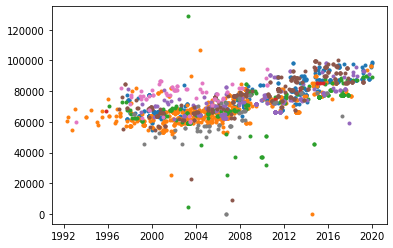

In [82]:
for marque in L_marque:
    plt.plot(locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]['Type du véhicule (porteur/tracteur)'] == 'TRACTEUR']["Date d'achat "], locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]['Type du véhicule (porteur/tracteur)'] == 'TRACTEUR']["Prix d'achat du camion complet (euros HT)"], '.')
    plt.show

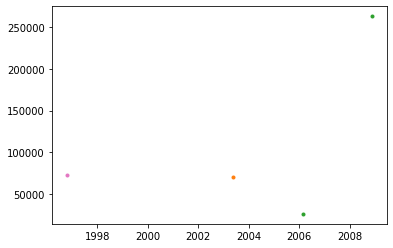

In [83]:
for marque in L_marque:
    plt.plot(locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]['Type du véhicule (porteur/tracteur)'] == 'PORTEUR']["Date d'achat "], locals()["df_" + f"{marque}"][locals()["df_" + f"{marque}"]['Type du véhicule (porteur/tracteur)'] == 'PORTEUR']["Prix d'achat du camion complet (euros HT)"], '.')
    plt.show

In [84]:
new_df['Tonnage (PTAC en tonnes)'].value_counts()

19.000    5223
17.990     236
26.000     158
18.000      97
19.200      62
          ... 
17.950       1
14.850       1
6.500        1
26.086       1
26.300       1
Name: Tonnage (PTAC en tonnes), Length: 67, dtype: int64

In [85]:
for x in new_df['Tonnage (PTAC en tonnes)']:
    if type(x) != float:
        print(x)

In [86]:
#Trouver le nombre de type de véhicule vendu par firme pour montrer qu'elles ne sont pas sur le même marché
#Pour plot les prix de l'un en fonction des prix de l'autre, il nous faut comparer les même type de camion. Il faut donc chaercher le type de camion.
#Regrouper par valeur de tonnage
def stat_marque_tonnage(data):
    #stat_VOLVO = data['nb_roues_x_nb_roues_motrice'].value_counts()
    data['Tonnage (PTAC en tonnes)'].dropna(inplace = True)
    #data = data[np.where(0 < data['Tonnage (PTAC en tonnes)'] < 5, '0-5', data['Tonnage (PTAC en tonnes)'])]
    new_data = np.where((5 < data['Tonnage (PTAC en tonnes)']) & (data['Tonnage (PTAC en tonnes)'] <= 10), '5-10', data['Tonnage (PTAC en tonnes)'])
    new_data = np.where((10 < new_data['Tonnage (PTAC en tonnes)']) & (new_data['Tonnage (PTAC en tonnes)'] <= 15), '10-15', new_data['Tonnage (PTAC en tonnes)'])
    new_data = np.where((15 < new_data['Tonnage (PTAC en tonnes)']) & (new_data['Tonnage (PTAC en tonnes)'] <= 20), '15-20', new_data['Tonnage (PTAC en tonnes)'])
    new_data = np.where((20 < new_data['Tonnage (PTAC en tonnes)']) & (new_data['Tonnage (PTAC en tonnes)'] <= 25), '20-25', new_data['Tonnage (PTAC en tonnes)'])
    print(new_data['Tonnage (PTAC en tonnes)'])
    stat_data = new_data['Tonnage (PTAC en tonnes)'].value_counts().rename_axis('type').reset_index(name='counts')
    #Modifier les valeurs de certaines colonnes qui sont mal labélisées.
    stat_data.dropna(inplace = True)
    #stat_data = data['nb_roues_x_nb_roues_motrice'].value_counts()
    return stat_data

In [87]:
#new_df['Tonnage (PTAC en tonnes)'] = new_df['Tonnage (PTAC en tonnes)'].apply(lambda x : float(x))

In [88]:
new_df['Tonnage (PTAC en tonnes)'].astype('float', copy=False)

0       19.0
1       19.0
2       19.0
3       19.0
4       19.0
        ... 
6543    19.0
6544    19.0
6545    19.0
6546    19.0
6547    19.0
Name: Tonnage (PTAC en tonnes), Length: 6548, dtype: float64

In [89]:
type(new_df['Tonnage (PTAC en tonnes)'][1])

numpy.float64

In [90]:
#Labeliser la colonne tonnage
def to_tonne_type(x):
    x = float(x)
    if 0 < x <= 5:
        x = '0-5'
    elif 5 < x <= 10:
        x = '10-15'
    elif 10 < x < 15:
        x = '10-15'
    elif 15 < x < 20:
        x = '15-20'
    elif 20 < x < 25:
        x = '20-25'
    elif 25 < x < 30:
        x = '25-30'
    return x

new_df['Tonnage (PTAC en tonnes)'] = new_df['Tonnage (PTAC en tonnes)'].map(to_tonne_type)     
type(new_df['Tonnage (PTAC en tonnes)'][1])
print(new_df['Tonnage (PTAC en tonnes)'])

0       15-20
1       15-20
2       15-20
3       15-20
4       15-20
        ...  
6543    15-20
6544    15-20
6545    15-20
6546    15-20
6547    15-20
Name: Tonnage (PTAC en tonnes), Length: 6548, dtype: object


In [91]:
#Renommer les valeurs mal labélisées
new_df = new_df.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})

new_df.replace({'nb_roues_x_nb_roues_motrice':'4X2'}, '4x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'6X2'}, '6x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'4 x 2'}, '4x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'6 x 2'}, '6x2', inplace = True)

In [92]:
new_df['nb_roues_x_nb_roues_motrice'].value_counts

<bound method IndexOpsMixin.value_counts of 0       4x2
1       4x2
2       4x2
3       4x2
4       4x2
       ... 
6543    4x2
6544    4x2
6545    4x2
6546    4x2
6547    4x2
Name: nb_roues_x_nb_roues_motrice, Length: 6548, dtype: object>

In [93]:
#To know the categories of rouexnbrouemotrice
new_df = new_df.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})

new_df.replace({'nb_roues_x_nb_roues_motrice':'4X2'}, '4x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'6X2'}, '6x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'4 x 2'}, '4x2', inplace = True)
new_df.replace({'nb_roues_x_nb_roues_motrice':'6 x 2'}, '6x2', inplace = True)

#stat_VOLVO = new_df['nb_roues_x_nb_roues_motrice'].value_counts()
stat_new_df = new_df['nb_roues_x_nb_roues_motrice'].value_counts()

stat_new_df

4x2       5224
6x2        149
2           99
6x4         19
8X4         11
6X2/4        5
6X4          3
8x2          2
8X6          1
6X2S         1
 4x2         1
4X2 6        1
4Xx2         1
42           1
<<<          1
8x4          1
TRIDEM       1
4X2X         1
             1
Name: nb_roues_x_nb_roues_motrice, dtype: int64

In [107]:
#Création des listes de catégorie
L_cat_roue = ['4x2', '6x2', '2', '6x4', '8x4']
L_cat_tonnage = ['0-5', '5-10', '10-25', '15-20', '20-25', '25-30']

#Création d'une dataframe avec comme ligne toutes les possibilités de catégories
# df_cat
cat_dict = {'type' : [], 'count' : []}
for y in L_cat_roue:
    for z in L_cat_tonnage:
        cat_dict['type'].append(f"{y} -- [{z}]")
        cat_dict['count'].append(0)
             
df_cat = pd.DataFrame(cat_dict)
print(new_df.columns)
#print(df_cat)
#new_df['Nombre de roues x nombre de roues motrices']
#new_df = new_df.rename(columns={'Nombre de roues x nombre de roues motrices' : 'nb_roues_x_nb_roues_motrice'})
#print(new_df['nb_roues_x_nb_roues_motrice'])
#Fonction apply qui :
# for y in L_cat_roue for z in L_cat_tonnage , if x[roue] == y and x[tonnnage] == z alors dataframe
def cat(x):
    for y in L_cat_roue:
        for z in L_cat_tonnage:
            print(x[11])
            if x[14] == y and x[11] == z:
                df_cat.at[f"{y} -- [{z}]", 'count'] += 1
            #if type(x[14]) == type(y):
              #  print('oui')
            #else:
                #print('non')
new_df.apply(cat)
#df_cat

Index(['clientID', 'clientsubID', 'Numéro d'immatriculation du camion ',
       'Date d'achat ', 'Camion encore en exploitation ',
       'Si camion hors exploitation, date de fin d'utlisation\n du camion ',
       'Kilométrage à la date\n de fin d'exploitation  ou au 1er janvier 2018',
       'Type du véhicule (porteur/tracteur)',
       'Camion neuf ou d'occasion au moment de l'acquisition ', 'Marque ',
       'Modèle ', 'Tonnage (PTAC en tonnes)',
       'Nombre d'essieux (nombre entier)', 'nb_roues_x_nb_roues_motrice',
       'Puissance du moteur \n(chevaux DIN) ',
       'Norme d'émissions \nEuro \n(EURO 1 à 6) ',
       'Mode d'acquisition du camion : \n(1) achat\n(2) leasing / crédit-bail \n(3) locatio',
       'Acquisition effectuée dans le cadre \nd'une acquisition groupée \n(plusieurs véhic',
       'Si acquisition groupée, taille de l'acquisition groupée \nen nombre de véhicules ',
       'Prix d'achat du camion complet (euros HT)',
       'Prix d'achat des équipements lourd

clientID                               None
clientsubID                            None
Numéro d'immatriculation du camion     None
Date d'achat                           None
Camion encore en exploitation          None
                                       ... 
acquisition                            None
grp                                    None
PTAC                                   None
Puissance                              None
roues_m                                None
Length: 62, dtype: object

In [75]:
new_df[new_df.columns[::11]]

,clientID,Tonnage (PTAC en tonnes),"Options onéreuses incluses dans le prix du châssis ? (groupe hydraulique, systèm",Véhicule acheté au terme du contrat ?,month,SCANIA
0,1,15-20,NaN,NaN,1.0,0
1,1,15-20,NaN,NaN,12.0,0
2,1,15-20,NaN,NaN,2.0,0
3,1,15-20,NaN,NaN,2.0,0
4,1,15-20,NaN,OUI,3.0,0
...,...,...,...,...,...,...
6543,40,15-20,NaN,NaN,7.0,0
6544,40,15-20,NaN,NaN,9.0,0
6545,40,15-20,NaN,NON,7.0,0
6546,40,15-20,NaN,NON,7.0,0


In [67]:
new_df.columns

Index(['clientID', 'clientsubID', 'Numéro d'immatriculation du camion ',
       'Date d'achat ', 'Camion encore en exploitation ',
       'Si camion hors exploitation, date de fin d'utlisation\n du camion ',
       'Kilométrage à la date\n de fin d'exploitation  ou au 1er janvier 2018',
       'Type du véhicule (porteur/tracteur)',
       'Camion neuf ou d'occasion au moment de l'acquisition ', 'Marque ',
       'Modèle ', 'Tonnage (PTAC en tonnes)',
       'Nombre d'essieux (nombre entier)', 'nb_roues_x_nb_roues_motrice',
       'Puissance du moteur \n(chevaux DIN) ',
       'Norme d'émissions \nEuro \n(EURO 1 à 6) ',
       'Mode d'acquisition du camion : \n(1) achat\n(2) leasing / crédit-bail \n(3) locatio',
       'Acquisition effectuée dans le cadre \nd'une acquisition groupée \n(plusieurs véhic',
       'Si acquisition groupée, taille de l'acquisition groupée \nen nombre de véhicules ',
       'Prix d'achat du camion complet (euros HT)',
       'Prix d'achat des équipements lourd